In [1]:
%matplotlib inline

import notebook
from notebook.nbextensions import enable_nbextension
enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
from astropy.time import Time
from astropy.io import fits
import glob
import itertools
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import os

import sys
sys.path.append('/Users/vs/Dropbox/Python')

bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
mp.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [2]:
#input_target = sys.argv[1]
#input_channel = sys.argv[2]
#catalog = sys.argv[3]

input_target = 'omegaCen_2'
input_channel = '3p6um'
catalog = 'kaluzny_field2_ch1.als'

In [3]:
if (input_channel == '1' or input_channel == '3p6um'):
	channel = '3p6um'
if (input_channel =='2' or input_channel == '4p5um'):
	channel = '4p5um'
    
field = input_target[-1]
#print field, channel


In [4]:
path = '/Volumes/Khaleesi/CRRP/Globular_Cluster_Output/omegaCen/'+ input_target +'_'+ channel + '/' + input_target + '_e*_' + channel + '_dn.fits'
input_image_list = glob.glob(path)
input_lc_data = input_target + '_' + channel + '.cal'

mjds = np.zeros(len(input_image_list))

for count in range(0, len(input_image_list)):
	hdulist = fits.open(input_image_list[count])
	prihdr = hdulist[0].header
	date_obs = Time(prihdr['date_obs'])
	mjds[count] = date_obs.mjd

epoch1_ids, kal_ids = np.loadtxt(input_target + '_' + channel + '_rrl.tfr', skiprows=14, usecols=(0, 15), unpack=True)
k_ids, periods = np.loadtxt(catalog, usecols=(0,5), unpack=True)
with open(input_lc_data) as input:
	lines = []
	while True:
		line = list(itertools.islice(input, 3))
		if line:
			lines.append(line)
		else:
			break

num_stars = len(lines)


In [5]:
kaluzny = pd.read_csv('kaluzny_catalogues/kaluzny2004_reformatted', delim_whitespace=True, header=None, names=('ID', 'RA', 'Dec', 'Period', 'Vmag', 'Type'))

In [6]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0


In [7]:
als_file = input_target + '_e1_' + channel + '_dn.cal'
als_df = pd.read_csv(als_file, delim_whitespace=True, header=None, names=('als_id', 'xc', 'yc', 'mag', 'err', 'lcorr'))

In [8]:
als_df

,als_id,xc,yc,mag,err,lcorr
0,3,18.23,188.16,15.732,0.098,0.979
1,4,18.26,234.23,15.361,0.061,0.980
2,5,18.63,85.36,14.081,0.084,0.973
3,6,18.80,96.21,15.022,0.070,0.974
4,7,19.79,495.27,16.713,0.126,0.968
5,8,20.06,107.68,16.301,0.092,0.975
6,9,20.07,544.12,14.366,0.332,0.962
7,10,20.35,291.82,16.151,0.075,0.981
8,11,20.42,89.59,15.433,0.124,0.973
9,12,20.50,228.05,16.647,0.129,0.981


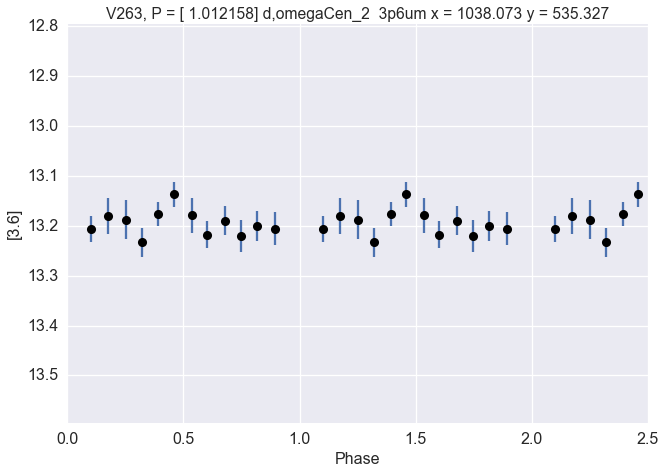

In [9]:
curr_dir = os.getcwd().split('/')[-1]
new_dir = input_target + '_' + channel + '_plots'
is_there = os.path.exists(new_dir)
if (curr_dir != new_dir):
    if (is_there == False):
        os.mkdir(new_dir)
        
for rrl in range(len(epoch1_ids)):
    k_a_id = kal_ids[rrl]
    ep1_id = epoch1_ids[rrl]
    period = periods[np.where(kal_ids==k_a_id)]
    #df.loc[df['column_name'] == some_value]
    cat_id = kaluzny.ID[kaluzny['Period'].isin(period)].values[0]
    kaluzny.loc[kaluzny['ID'] == cat_id, 'als_id'] = ep1_id   
    num_frames = 12
    objects = np.zeros((num_stars, (num_frames*2) + 3))
    for star in np.arange(0,num_stars):
        data = "".join(lines[star])
        data = data.split()
        objects[star][0] = data[0] ## ID
        objects[star][1] = data[1] ## XC
        objects[star][2] = data[2] ## YC
        for epoch in np.arange(0,(num_frames*2), 2):
            objects[star][epoch + 3]  = data[epoch + 3] ## mag
            objects[star][epoch + 4] = data[epoch + 4] ## err
        if objects[star][0] == epoch1_ids[rrl]:
            best_star = star
            break
    mag = np.zeros(num_frames)
    err = np.zeros(num_frames)
    for epoch in np.arange(0,num_frames):
        mag[epoch] = objects[best_star][(epoch*2) + 3]  
        err[epoch] = objects[best_star][(epoch*2) + 4] 
    #print 'matched star' + str(k_a_id) + 'to ' + str(cat_id) + 'with period ' + str(period)
    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)


    output = str(cat_id) + '_rrlyrae.data'
    output_file = open(new_dir + '/' + output, "w")

    for frame in np.arange(0, num_frames):
        output_file.write("{0:.8f} {1:.3f} {2:.3f} \n".format(mjds[frame], mag[frame], err[frame]))
    
    output_file.close()
    ## Sanity check plot

    mp.close()
    mp.clf()
    axp1 = mp.subplot(111)

    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d,' + input_target + '  ' + channel + ' x = ' + str(objects[best_star][1]) + ' y = ' +  str(objects[best_star][2]))
    #mp.show()

    mp.savefig(new_dir + '/' + str(cat_id) + '_F' + field + '_' + channel +'.pdf')

    #mp.close()
   

In [10]:
len(periods)

19

In [11]:
    #mp.clf()
    #axp2 = mp.subplot(111)
    #axp2.invert_yaxis()

    #dates = np.concatenate((mjds, mjds, mjds, mjds, mjds))
    #axp2.axis([0,num_frames+1,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])
    #axp2.errorbar(obs, mag, yerr=err, ls='None')

    #axp2.plot(obs, mag, 'ko', ls='None')
    #mp.xlabel('Observation Number')
    #if (channel == '3p6um'): mp.ylabel('[3.6]')
    #if (channel == '4p5um'): mp.ylabel('[4.5]')
    #mp.title(cat_id + ', P = ' + str(period) +' d')
   

In [12]:
 #mp.savefig('plots/' + str(cat_id) +'_timeseries.pdf')

In [13]:
len(epoch1_ids)

19

In [14]:
sum(kaluzny.als_id>0)

19

In [15]:
outfile = input_target + '_' + channel + '_rrl' + '_matched_to_kaluzny.cal'
print outfile


omegaCen_2_3p6um_rrl_matched_to_kaluzny.cal


In [16]:
#als_df

In [17]:
#kaluzny

In [18]:
merged_tables = als_df.merge(kaluzny, on='als_id')

In [19]:
merged_tables

,als_id,xc,yc,mag,err,lcorr,ID,RA,Dec,Period,Vmag,Type
0,2223,380.88,428.14,12.687,0.021,1.007,V66,13:26:33.08,-47:22:25.2,0.407266,14.30,RR1
1,2675,441.48,488.89,12.085,0.013,1.004,V68,13:26:12.80,-47:19:35.7,0.534609,14.04,RR1
2,3965,593.71,127.29,16.309,0.099,1.006,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1
3,4209,625.09,564.02,12.214,0.054,0.989,V263,13:26:13.13,-47:26:09.7,1.012158,14.20,RR0
4,4511,663.33,109.47,12.428,0.039,1.007,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0
5,5394,781.79,84.30,16.040,0.112,0.980,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0
6,5753,822.13,256.46,15.607,0.093,0.995,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0
7,5787,826.63,55.90,13.292,0.116,0.984,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0
8,6297,884.58,519.07,12.794,0.034,0.984,V94,13:25:57.06,-47:22:46.1,0.253936,14.60,RR1
9,6805,945.76,258.72,15.245,0.050,1.004,V15,13:26:27.11,-47:24:38.0,0.810642,14.04,RR0


In [20]:
merged_tables.to_csv(outfile, sep='\t', header=True, index=False)

In [21]:
epoch1_ids

array([ 5787.,  5394.,  4511.,  7951.,  3965.,  7991.,  7053.,  5753.,
        6805.,  9194.,  7671.,  9243.,  8779.,  2223.,  8310.,  2675.,
        6297.,  7533.,  4209.])

In [22]:
rrl

18

In [23]:
kal_ids

array([  9.,   7.,   6.,  19.,  14.,  10.,   2.,   3.,  13.,   4.,   5.,
         1.,   8.,  15.,  11.,  12.,  18.,  17.,  16.])

In [24]:
len(kal_ids)

19

In [25]:
range(len(epoch1_ids))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [26]:
periods

array([ 0.841258,  0.62732 ,  0.515274,  0.52348 ,  0.374976,  0.564789,
        0.386769,  0.669039,  0.810642,  0.380812,  0.485303,  0.772915,
        0.36988 ,  0.407266,  0.564451,  0.534609,  0.253936,  0.3332  ,
        1.012158])

In [27]:
len(periods)

19

In [28]:
### Doing some quality checks on the matching

